In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import julian

In [2]:
f=open("aavso_RS.txt","r")
lines=f.readlines()
mags=[]
JD = []
err = []
band = []
date = []

for x in lines:   
    mags.append(x.split(',')[1])
    JD.append(x.split(',')[0])
    err.append(x.split(',')[2])
    band.append(x.split(',')[4])            
f.close()

    
v_pos = [i for i, x in enumerate(band) if x == "V"]
b_pos = [i for i, x in enumerate(band) if x == "B"]
vis_pos = [i for i, x in enumerate(band) if x == "Vis."]

#print(v_pos)
mag_array = np.array(mags)
JD_array = np.array(JD)
date_array = np.array(date)

v_mags = mag_array[v_pos]
v_JD = JD_array[v_pos]

v_JD = v_JD.astype(float)
v_mags = v_mags.astype(float)


b_mags = mag_array[b_pos]
b_JD = JD_array[b_pos]

b_JD = b_JD.astype(float)
b_mags = b_mags.astype(float)


vis_mags = mag_array[vis_pos]
vis_JD = JD_array[vis_pos]

vis_JD = vis_JD.astype(float)
vis_mags = vis_mags.astype(float)

In [3]:
del mags[0]
del JD[0]
del err[0]
print(len(vis_mags))

48125


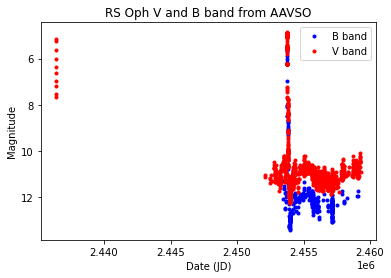

4.861
12.24


In [4]:



plt.gca().invert_yaxis()
plt.plot(b_JD,b_mags,'b.',label = 'B band')
plt.plot(v_JD,v_mags,'r.',label = 'V band')
plt.legend()
plt.xlabel('Date (JD)')
plt.ylabel('Magnitude')
plt.title('RS Oph V and B band from AAVSO')
plt.show()
print(np.min(v_mags))
print(np.max(v_mags))

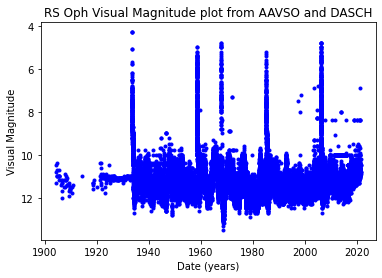

In [5]:
vis_date = []
length = len(vis_JD)
n = 0
while n < length:
    vis_date.append(julian.from_jd(vis_JD[n]-2400000.5, fmt='mjd'))
    n = n+1
    
    


plt.plot(vis_date,vis_mags,'b.',label = 'Visual band')
plt.gca().invert_yaxis()
plt.ylabel('Visual Magnitude')
plt.xlabel('Date (years)')
plt.title('RS Oph Visual Magnitude plot from AAVSO and DASCH')
plt.savefig('Vis_dat_rs')

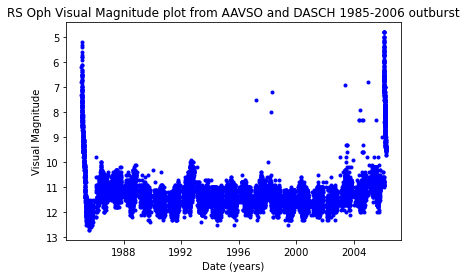

In [6]:
#plt.figure(figsize=(30,15))

plt.plot(vis_date[20106:40000],vis_mags[20106:40000],'b.',label = 'Visual band')
plt.gca().invert_yaxis()
plt.ylabel('Visual Magnitude')
plt.xlabel('Date (years)')
plt.title('RS Oph Visual Magnitude plot from AAVSO and DASCH 1985-2006 outburst')
plt.savefig('vis_dat_rs_8506')

In [7]:
v_JD_r = [round(num,2) for num in v_JD]
b_JD_r = [round(num,2) for num in b_JD]

v_JD_r = np.array(v_JD_r)
b_JD_r = np.array(b_JD_r)

In [8]:
t_JD_r = (np.intersect1d(b_JD_r, v_JD_r))

In [9]:
(t_JD_r[:, None] == v_JD_r).argmax(axis=0)

t_v_pos = (v_JD_r[:, None] == t_JD_r).argmax(axis=0)

t_b_pos = (b_JD_r[:, None] == t_JD_r).argmax(axis=0)

In [10]:
t_v_mags = v_mags[t_v_pos]
t_b_mags = b_mags[t_b_pos]

In [11]:
t_b_mags = t_b_mags.astype(float)

t_v_mags = t_v_mags.astype(float)

In [12]:
bmv = t_b_mags - t_v_mags
print(bmv)

[1.12  1.07  0.91  0.83  0.9   0.77  0.78  0.8   0.7   0.66  0.79  0.65
 0.65  0.62  0.71  0.68  0.6   0.689 0.64  0.67  0.56  0.64  0.66  0.76
 0.78  0.9   0.87  1.08  1.28  1.25  1.43  1.47  1.176 1.134 1.296 1.52
 1.534 1.539 1.53  1.51  1.562 1.522 1.475 1.56  1.462 1.514 1.534 1.502
 1.525 1.588 1.445 1.521 1.495 1.501 1.421 1.45  1.494 1.45  1.495 1.49
 1.35  1.46  1.399 1.422 1.305 1.417 1.244 1.412 1.426 1.364 1.331 1.31
 1.363 1.51  1.33  1.36  1.07  1.17  1.23  1.21  1.12  1.15  1.22  1.18
 1.31  1.09  0.87  1.15  1.1   1.26  1.23  1.21  1.23  1.08  1.13  1.13
 0.99  0.96  1.08  1.07  1.15  1.05  1.06  1.11  0.94  1.18  1.194 1.129
 1.247 1.195 1.169 1.121 1.118 1.044 1.156 1.108 1.094 1.073 1.238 1.147
 1.19  1.192 1.151 1.092 1.124 1.175 1.153 1.112 1.238 1.172 1.189 1.27
 1.282 1.292 1.225 1.245 1.187 1.121 1.254 1.104 1.195 1.226 1.107 1.033
 1.186 1.28  1.217 1.152 1.014 1.161 1.224 1.28  1.258 1.186 1.33  1.06
 1.06  1.07  0.96  1.14  1.134 0.905 1.097 0.64  1.011 1.764

In [13]:
teff = []
def temp(BV):
    T =  ( (1/((0.92*BV)+1.7)) + (1/((0.92*BV)+0.62)) ) * 4600
    teff.append(T)
    return T

In [14]:
n = 0
for i in bmv:
    temp(bmv[n])
    n = n + 1

np.mean(bmv)

1.1517185929648242

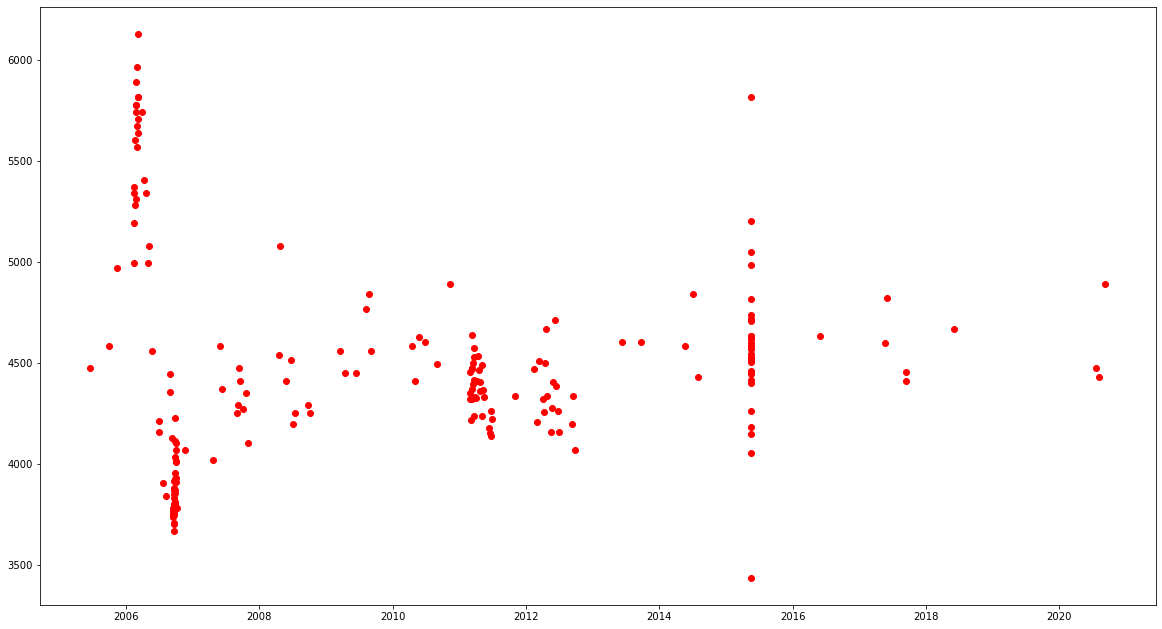

In [15]:
t_date = []
length = len(t_JD_r)
n = 0
while n < length:
    t_date.append(julian.from_jd(t_JD_r[n]-2400000.5, fmt='mjd'))
    n = n+1
    



plt.figure(figsize = (20,11))
plt.plot(t_date,teff,'ro')

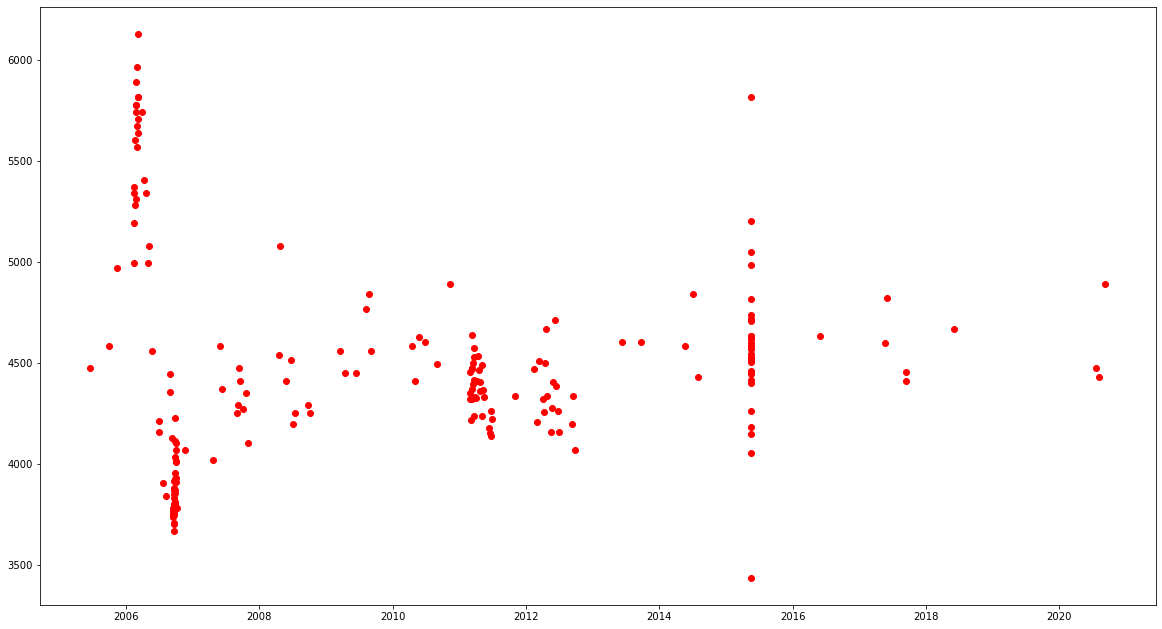

In [16]:
plt.figure(figsize = (20,11))
plt.plot(t_date,teff,'ro')

In [17]:
b_date = []
length = len(b_JD)
n = 0
while n < length:
    b_date.append(julian.from_jd(b_JD[n]-2400000.5, fmt='mjd'))
    n = n+1

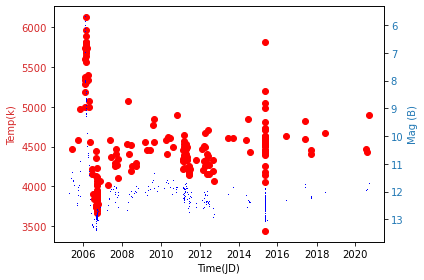

In [18]:
data1 = teff
data2 = b_mags
t = b_JD
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Time(JD)')
ax1.set_ylabel('Temp(k)', color=color)


ax1.plot(t_date, data1, 'ro')

ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Mag (B)', color=color)  # we already handled the x-label with ax1
ax2.plot(b_date, data2, 'b,')
plt.gca().invert_yaxis()
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [19]:
v_date = []
length = len(v_JD)
n = 0
while n < length:
    v_date.append(julian.from_jd(v_JD[n]-2400000.5, fmt='mjd'))
    n = n+1

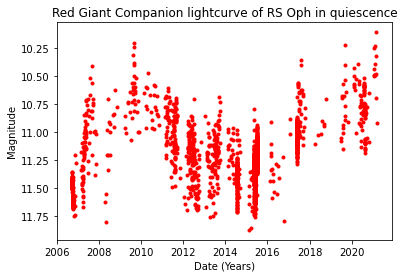

In [20]:
plt.gca().invert_yaxis()
plt.plot(v_date[2300:5000],v_mags[2300:5000],'r.',label = 'V band')
#plt.plot(b_JD[:900],b_mags[:900],'b.',label = 'B band')
plt.xlabel('Date (Years)')
plt.ylabel('Magnitude')
plt.title('Red Giant Companion lightcurve of RS Oph in quiescence')
plt.savefig('rs oph comp')

In [21]:
# %%time

# # Open data
# v_JD_n = v_JD - 2436399.694
# t = v_JD_n[2300:5000]
# mags = v_mags[2300:5000]
# avg_mags = np.mean(mags)
# f = mags - avg_mags		# the difference between the magnitude and the average magnitude
# print(len(t))
# print(len(mags))
# print(len(f))


# n = len(t)

# # Plot mags vs JD
# plt.figure(0)
# plt.gca().invert_yaxis()

# plt.plot(t, mags, 'k.')
# plt.title("$\Delta$B vs JD 2441400+")
# #print(diff_t)
# # Find frequency Nyquist
# diff_t = np.diff(t)	# Difference for each observation time
# print(diff_t)
# wa = 1/((np.min(diff_t)+3.69999977e-03)*2) # w = 1/2*Pmin
# print(wa)
# # Selang 
# s = .0001			# Interval/Step, the smaller the better, but should not be too small
# dt = t[n-1]-t[0] 	# Time of observation, in days


# #Method of Date Compensated Discrete Fourier Transform (DCDFT)
# a0 = np.sqrt(1/n)
# S = []
# H = []
# C = []
# alpha = ((2.*(n-3)*dt*wa)/(3.*(n-4)))

# ws = np.arange(s,wa,s)
# for w in ws:
# 	sum_cos2x = sum_cosx = sum_cosxsinx = sum_sin2x = sum_sinx = sum_f_cos = sum_f_sin = sum_f2 = 0
# 	for i in range(n):
# 		x = 2.*np.pi*w*t[i]
# 		sum_cos2x += np.cos(x)**2
# 		sum_cosx += np.cos(x)
# 		sum_cosxsinx += (np.cos(x)*np.sin(x))
# 		sum_sin2x += np.sin(x)**2
# 		sum_sinx += np.sin(x)
# 		sum_f_cos += f[i]*np.cos(x)
# 		sum_f_sin += f[i]*np.sin(x)
# 		sum_f2 += f[i]**2
# 		pass
# 	M = sum_cosxsinx - (a0**2)*(sum_sinx)*(sum_cosx)
# 	a1 = np.sqrt(1./(sum_cos2x - (a0**2)*(sum_cosx**2)))
# 	a2 = np.sqrt(1./(sum_sin2x - (a0**2)*(sum_sinx**2) - (a1**2)*M))
# 	c1 = a1*sum_f_cos
# 	c2 = a2*sum_f_sin - (a1*a2*c1*M)
# 	S_ = ( c1**2. + c2**2. )/sum_f2
# 	G = (-1.*((n-3)/2.)*np.log(1.-(S_)))
# 	H_ = ((n-4)*1./(n-3))*(G + np.exp(-1.*G)-1.)
# 	S.append(S_)
# 	H.append(H_)
# 	C.append(100*(1-np.exp(-H_))**alpha)

# fig, ax1 = plt.subplots()
# ax1.plot(np.arange(s,wa,s),H,"b-", label="H")
# ax1.plot(np.arange(s,wa,s),S,"r-", label="Spectral Correlation")
# ax2 = ax1.twinx()
# ax2.plot(np.arange(s,wa,s),C,"k-.", lw=1.2, label="Confident Level (%)")
# fig.tight_layout()
# ax1.legend(loc="upper left")
# ax2.legend(loc="upper right")
# ax1.set_xlabel('$frequency$')
# ax1.set_ylabel('H($\omega$)')
# ax1.set_xlim(0,wa)
# ax2.set_ylabel('Confident Level (%)')
# ax2.grid(color='k', linestyle='--', linewidth=.5)
# ax1.set_title("Modified Periodogram or graph of the function H($\omega$). The confidence levels are also shown.")

# # Find the Period 
# P = 1/ws[np.argmax(H)]

# fase_ = (t-t[0])/P
# fase = (fase_) - np.floor(fase_)
# fase = fase - fase[np.argmax(mags)]
# fase_negatif = fase[fase < 0.]
# fase = fase.tolist()
# arg_fase_negatif = []
# for neg in fase_negatif:
# 	# arg_fase_negatif.append(fase.index(neg))
# 	index = fase.index(neg)
# 	fase[index] = 1 + neg

# plt.figure(2)
# plt.figure(figsize=(20,11))
# plt.plot(fase,mags,'b.')
# plt.xlabel('Phase') 
# plt.xlim(0,1)
# plt.ylabel('$\Delta$B')
# plt.title('Light Curve RS Oph')

# #Printing calculation results
# # Print Period
# print ("Nyquist frequency = {:.3f}".format(wa))
# print ("The period of RS Oph {:.3f}".format(P))
# # # Print data
# # print ("\nTabel 1. Data RS Oph")
# # print ("============================================")
# # print ("t\t\tdelta_B\t\tf\tfase")
# # for i in range(n):
# # 	print ("{}\t{}\t{:.3f}\t{:.3f}".format(t[i],mags[i],f[i],fase[i]))

# # Show plot
# plt.show()

In [22]:

plt.plot(fase,mags,'b,')
plt.xlabel('Phase') 
plt.xlim(0,1)
plt.ylabel('$\Delta$M')
plt.title('Light Curve RS Oph')

NameError: name 'fase' is not defined

In [23]:
print(np.min(v_mags))

4.861


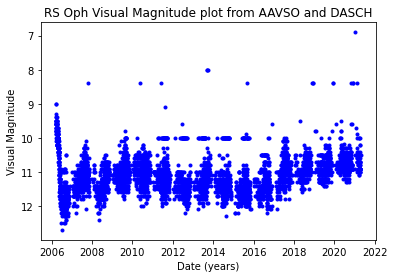

In [72]:
plt.plot(vis_date[40000:900000],vis_mags[40000:900000],'b.',label = 'Visual band')
plt.gca().invert_yaxis()
plt.ylabel('Visual Magnitude')
plt.xlabel('Date (years)')
plt.title('RS Oph Visual Magnitude plot from AAVSO and DASCH')
plt.savefig('Vis_dat_rs_5')